In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import load_data as ld
import seaborn as sns
import geopandas as gpd

dir_data = "C:\\Users\\nicol\\Data\\data.gouv.fr\\"

# Véhicules immatriculés impliqués dans les accidents corporels - 2009 à 2021
dic_vehic_immat = ld.load_vehic_immat(folder_path=dir_data, start_year=2009, end_year=2021)

# Caractéristiques
dic_caract = ld.load_caract(folder_path=dir_data, start_year=2005, end_year=2021)

# Lieux
dic_lieux = ld.load_lieux(folder_path=dir_data, start_year=2005, end_year=2021)

# Usagers
dic_usagers = ld.load_usagers(folder_path=dir_data, start_year=2005, end_year=2021)

# Véhicules
dic_vehic = ld.load_vehicules(folder_path=dir_data, start_year=2005, end_year=2021)


C:\Users\nicol\git\projet-accidents-routiers\load_data.py:23: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  vehic[2009] = pd.read_csv(folder_path + '2009.csv', sep=';')
C:\Users\nicol\git\projet-accidents-routiers\load_data.py:167: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  lieux[2016] = pd.read_csv(folder_path + 'lieux_2016.csv', sep=',')
C:\Users\nicol\git\projet-accidents-routiers\load_data.py:169: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  lieux[2017] = pd.read_csv(folder_path + 'lieux-2017.csv', sep=',')
C:\Users\nicol\git\projet-accidents-routiers\load_data.py:171: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  lieux[2018] = pd.read_csv(folder_path + 'lieux-2018.csv', sep=',')


Usagers - Dimension des données selon les années : 

usagers 2018 : (130169, 12)
usagers 2019 : (132977, 15)
usagers 2020 : (105295, 15)
usagers 2021 : (129153, 15)

Usagers - Variables selon les années : 

usagers 2018 : ['Num_Acc', 'place', 'catu', 'grav', 'sexe', 'trajet', 'secu', 'locp', 'actp', 'etatp', 'an_nais', 'num_veh']
usagers 2019 : ['Num_Acc', 'id_vehicule', 'num_veh', 'place', 'catu', 'grav', 'sexe', 'an_nais', 'trajet', 'secu1', 'secu2', 'secu3', 'locp', 'actp', 'etatp']
usagers 2020 : ['Num_Acc', 'id_vehicule', 'num_veh', 'place', 'catu', 'grav', 'sexe', 'an_nais', 'trajet', 'secu1', 'secu2', 'secu3', 'locp', 'actp', 'etatp']
usagers 2021 : ['Num_Acc', 'id_vehicule', 'num_veh', 'place', 'catu', 'grav', 'sexe', 'an_nais', 'trajet', 'secu1', 'secu2', 'secu3', 'locp', 'actp', 'etatp']

Usagers - Modalités de la variable grav : 

usagers 2018 : 1    54248
4    50360
3    22169
2     3392
Name: grav, dtype: int64
usagers 2019 : 1    55314
4    53307
3    20858
2     3498
Nam

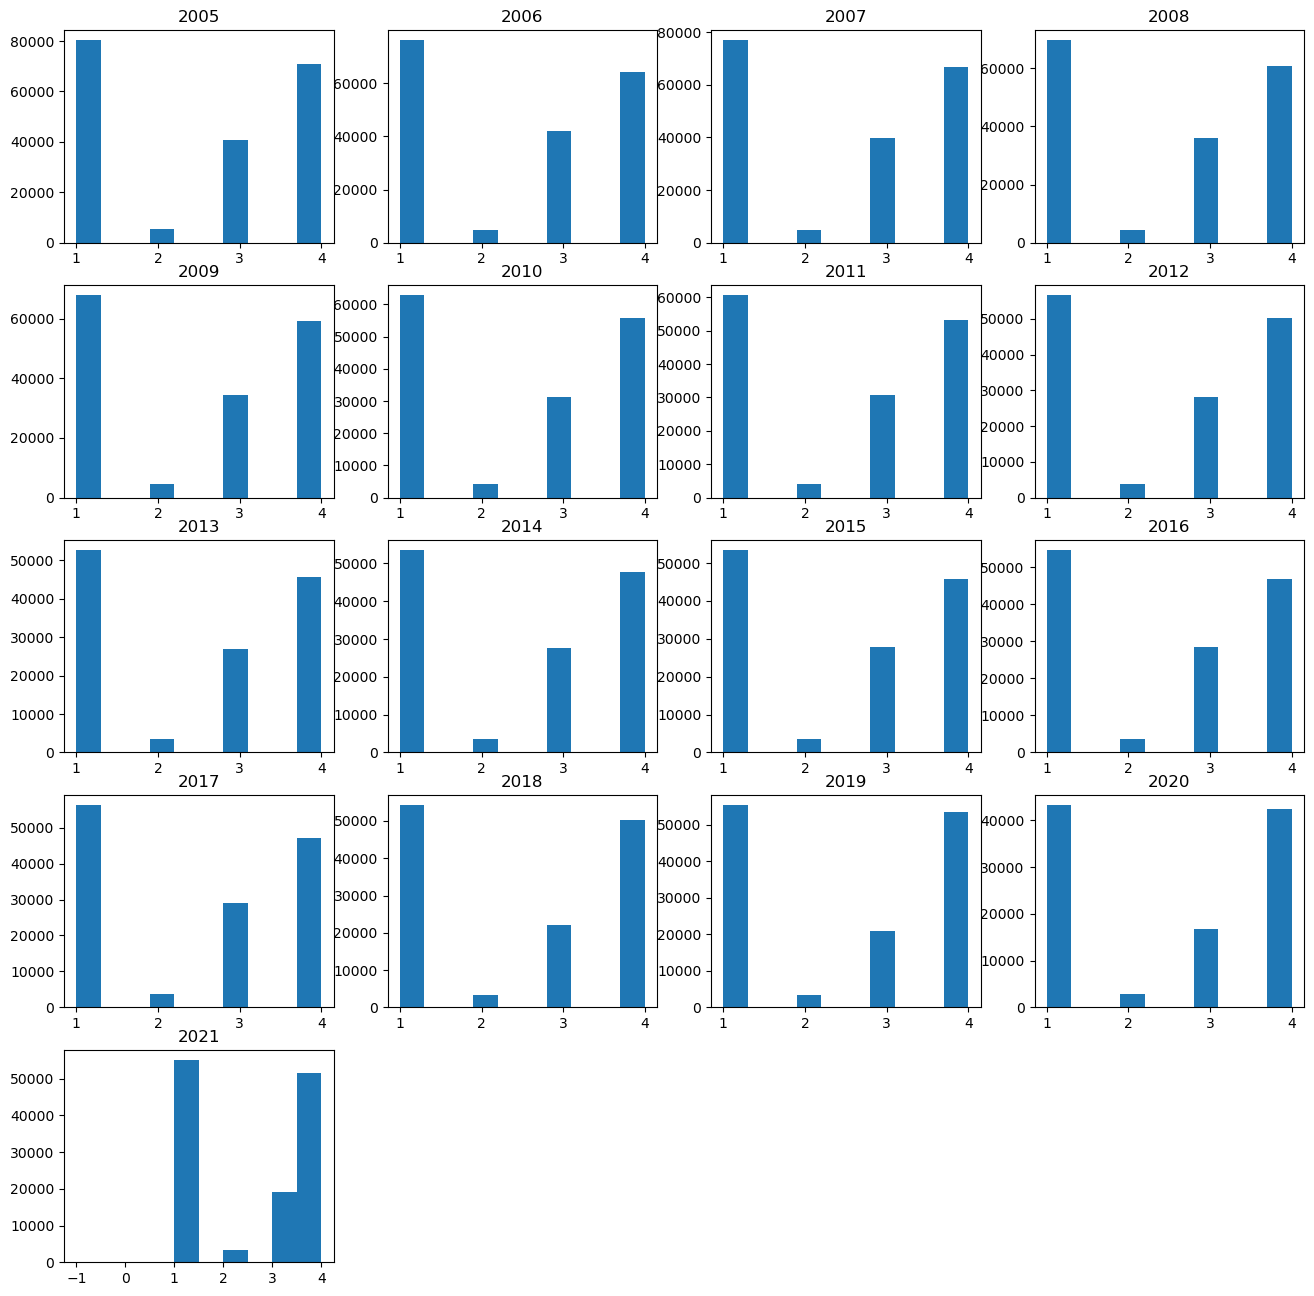

In [2]:
# Etude des fichiers usagers-yyyy.csv

# 1 : Indemne
# 2 : Tué
# 3 : Blessé hospitalisé
# 4 : Blessé léger

print("Usagers - Dimension des données selon les années : \n")
for year in range(2018, 2022):
    print(f"usagers {year} : {dic_usagers[year].shape}")

print("\nUsagers - Variables selon les années : \n")
for year in range(2018, 2022):
    print(f"usagers {year} : {list(dic_usagers[year].columns)}")

print("\nUsagers - Modalités de la variable grav : \n")
for year in range(2018, 2022):
    print(f"usagers {year} : {dic_usagers[year]['grav'].value_counts()}")


plt.figure(figsize=(16, 16))
plt.title('Répartition de la gravité des accidents par année depuis 2005')
for k in range(1, 18):
    year = 2005 + k -1
    plt.subplot(5, 4, k)
    plt.hist(dic_usagers[year].grav);
    plt.title(year)

## Analyse usagers

Help on function load_usagers in module load_data:

load_usagers(folder_path, start_year, end_year)
    Retourne les données dans un dictionnaire de dataframes dont la clé est l'année au format entier
    
    ex : usagers = load_usagers(2019, 2021)
    les données de l'années 2020 sont accesibles usagers[2020]
    
    Num_Acc : identifiant de l'accident
    id_vehicule : identifiant unique du véhicule repris pour chacun des usagers occupant ce véhicule
    num_veh : identifiant du véhicule repris pour chacun des usagers occupant ce véhicule
    place : permet de situer la place occupée dans le véhicule par l'usager au moment de l'accident
    catu : catégorie d'usager
    grav : gravité de l'accident (!!!VARIABLE CIBLE!!!)
    sexe : sexe de l'usager
    an_nais : année de naissance de l'usager
    trajet : motif du déplacement au moment de l’accident
    secu1 : le renseignement du caractère indique la présence et l’utilisation de l’équipement de sécurité
    secu2 : le renseignemen

C:\Users\nicol\AppData\Local\Temp\ipykernel_3528\488006268.py:10: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df[['place', 'catu', 'grav', 'sexe', 'an_nais', 'trajet', 'secu1', 'secu2', 'locp', 'actp', 'etatp']].hist(ax = ax);


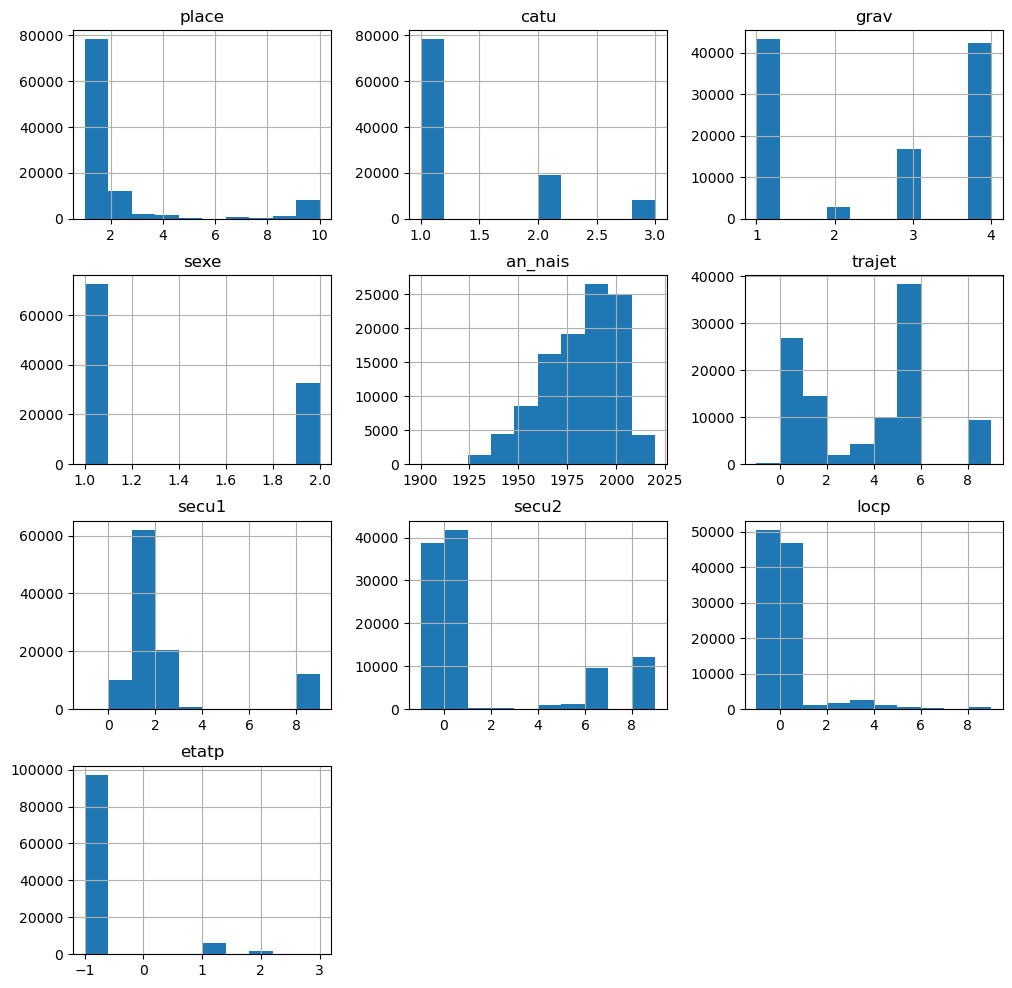

In [3]:
# Analyse rapide des colonnes du fichier usager

help(ld.load_usagers)

df = dic_usagers[2020]
print(list(df.columns))

fig = plt.figure(figsize=(12, 12))
ax = fig.gca()
df[['place', 'catu', 'grav', 'sexe', 'an_nais', 'trajet', 'secu1', 'secu2', 'locp', 'actp', 'etatp']].hist(ax = ax);
# conducteur très majoritairement impliqué
# ~70% d'hommes vs ~30% femmes
# pic de jeunes conducteurs
# pics sur promenade et trajets domicile-travail

## Analyse caracteristiques

Help on function load_caract in module load_data:

load_caract(folder_path, start_year, end_year)
    Retourne les données dans un dictionnaire de dataframes dont la clé est l'année au format entier
    
    ex : caract = load_caract(2019, 2021)
    les données de l'années 2020 sont accessibles caract[2020]
    
    Num_Acc : identifiant de l'accident
    jour : jour de l'accident
    mois : mois de l'accident
    an : année de l'accident
    hrmn : hh:mm de l'accident
    lum : conditions de luminosité (1: Plein jour, ..., 5:Nuit avec éclairage public allumé)
    dep : département (code INSEE)
    com : commune (code INSEE)
    agg : localisation (1: hors agglomération, 2: en agglomération)
    int : intersection (1: Hors intersection, ..., 9: Autre intersection)
    atm : conditions atmosphériques (-1: Non renseigné, 1: Normale, ..., 8: Temps couvert, 9: Autre)
    col : type de collision (-1: Non renseigné, 1:Deux véhicules - frontale, ..., 6: Autre collision, 7: Sans collision)
   

C:\Users\nicol\AppData\Local\Temp\ipykernel_3528\1563394670.py:12: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df[['mois', 'lum', 'dep', 'com', 'agg', 'int', 'atm', 'col']].hist(ax = ax);


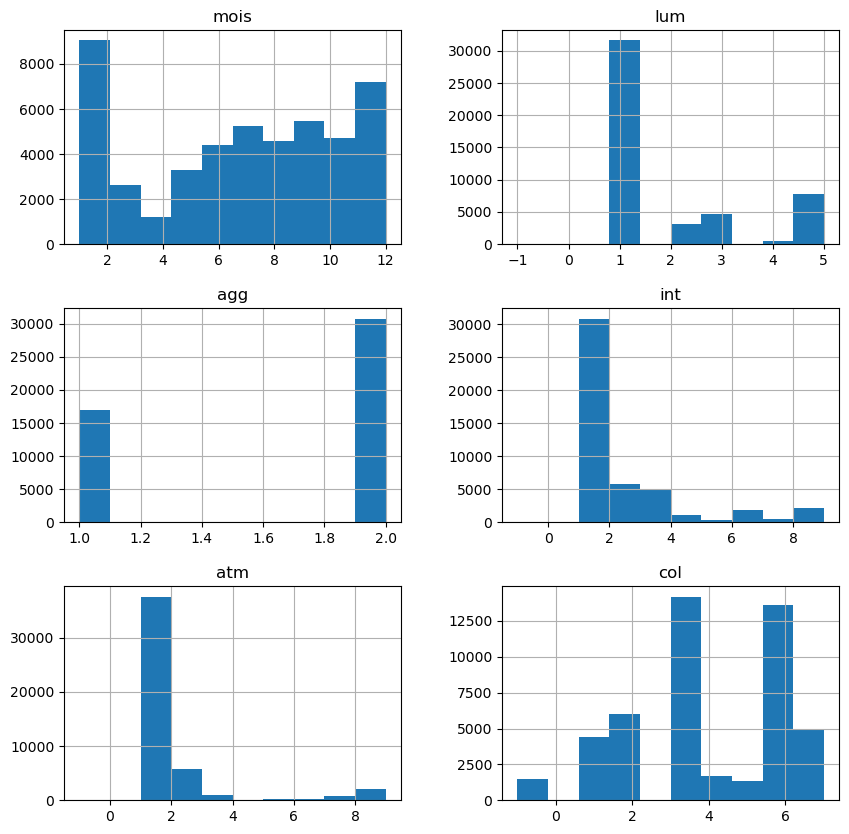

In [4]:
# Analyse rapide des colonnes du fichier caractéristiques

help(ld.load_caract)

df = dic_caract[2020]
print(list(df.columns))

df.head()
# cols = ['mois', 'hrmn', 'lum', 'dep', 'com', 'agg', 'int', 'atm', 'col', 'lat', 'long']
fig = plt.figure(figsize=(10, 10))
ax = fig.gca()
df[['mois', 'lum', 'dep', 'com', 'agg', 'int', 'atm', 'col']].hist(ax = ax);


## Analyse vehicules

Help on function load_vehicules in module load_data:

load_vehicules(folder_path, start_year, end_year)
    Retourne les données dans un dictionnaire de dataframes dont la clé est l'année au format entier
    
    ex : vehicles = load_vehicules(2019, 2021)
    les données de l'années 2020 sont accesibles vehicles[2020]
    
    Num_Acc : identifiant de l'accident
    id_vehicule : identifiant du véhicule
    num_veh : identifiant du véhicule repris pour chacun des usagers occupant ce véhicule
    senc : sens de circulation
    catv : catégorie du véhicule
    obs : obstacle fixe heurté
    obsm : obstacle mobile heurté
    choc : point de choc initial
    manv : manoeuvre principale avant l'accident
    motor : type de motorisation du véhicule
    occutc : nombre d’occupants dans le transport en commun

['Num_Acc', 'id_vehicule', 'num_veh', 'senc', 'catv', 'obs', 'obsm', 'choc', 'manv', 'motor', 'occutc']


C:\Users\nicol\AppData\Local\Temp\ipykernel_3528\2447562423.py:12: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df[['senc', 'catv', 'obs', 'obsm', 'choc', 'manv', 'motor', 'occutc']].hist(ax = ax);


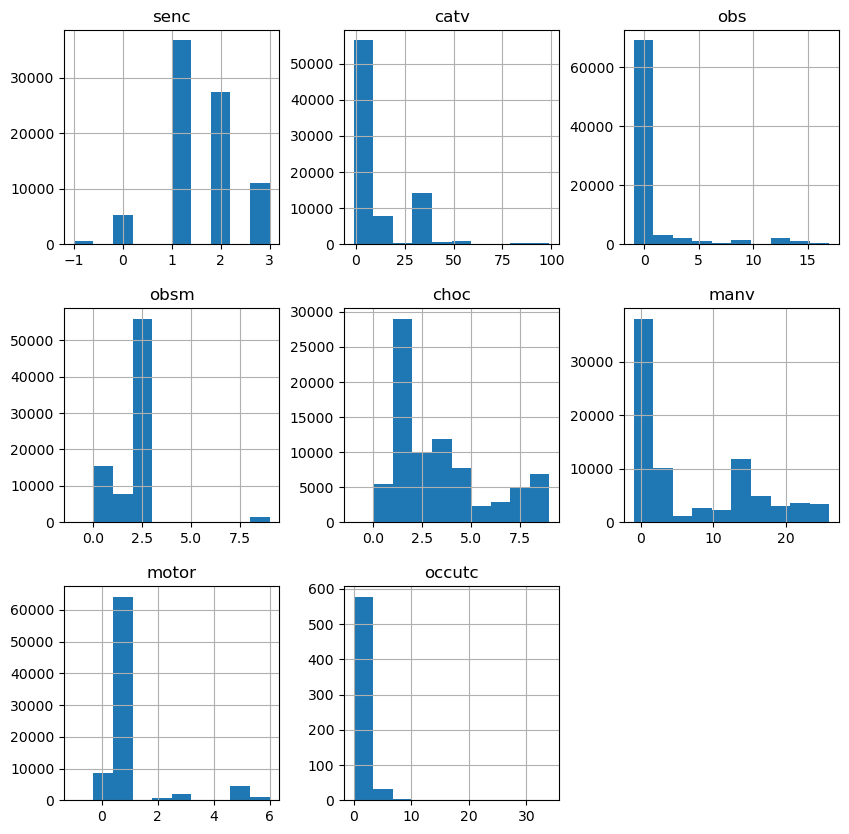

In [5]:
# Analyse rapide des colonnes du fichier vehicules

help(ld.load_vehicules)

df = dic_vehic[2020]
print(list(df.columns))

df.head()
# cols = ['mois', 'hrmn', 'lum', 'dep', 'com', 'agg', 'int', 'atm', 'col', 'lat', 'long']
fig = plt.figure(figsize=(10, 10))
ax = fig.gca()
df[['senc', 'catv', 'obs', 'obsm', 'choc', 'manv', 'motor', 'occutc']].hist(ax = ax);


## Analyse lieux

Help on function load_lieux in module load_data:

load_lieux(folder_path, start_year, end_year)
    Retourne les données dans un dictionnaire de dataframes dont la clé est l'année au format entier
    
    ex : lieux = load_lieux(2019, 2021)
    les données de l'années 2020 sont accessibles lieux[2020]
    
    Num_Acc : identifiant de l'accident
    catr : catégorie de route
    voie : numéro de la route
    v1 : indice numérique du numéro de route
    v2 : lettre indice alphanumérique de la route
    circ : régime de circulation
    nbv : nombre total de voies de circulation
    vosp : signale l’existence d’une voie réservée, indépendamment du fait que l’accident ait lieu ou non sur cette voie.
    prof : profil en long décrit la déclivité de la route à l'endroit de l'accident
    pr : numéro du PR de rattachement (numéro de la borne amont)
    pr1 : distance en mètres au PR (par rapport à la borne amont)
    plan : tracé en plan ( 1:Partie rectiligne, 2:En courbe à gauche, 3:En cour

C:\Users\nicol\AppData\Local\Temp\ipykernel_3528\525789030.py:11: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df[['catr', 'circ', 'nbv', 'vosp', 'prof', 'plan', 'surf', 'infra', 'situ', 'vma']].hist(ax = ax);


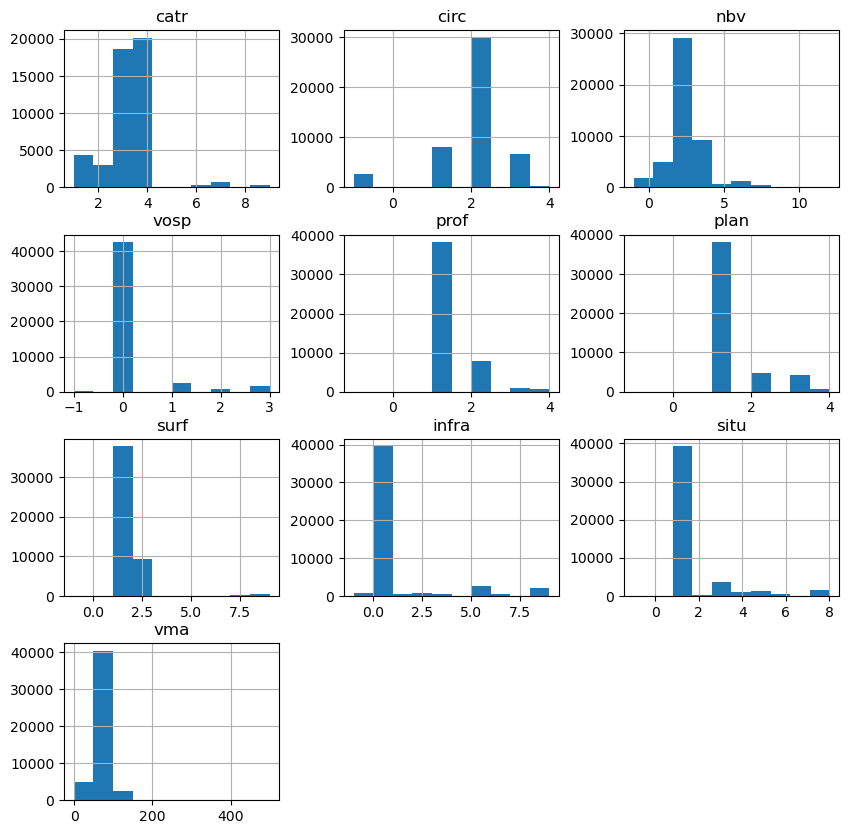

In [6]:
# Analyse rapide des colonnes du fichier vehicules

help(ld.load_lieux)

df = dic_lieux[2020]
print(list(df.columns))

df.head()
fig = plt.figure(figsize=(10, 10))
ax = fig.gca()
df[['catr', 'circ', 'nbv', 'vosp', 'prof', 'plan', 'surf', 'infra', 'situ', 'vma']].hist(ax = ax);


## Analyse véhicules immat impliqués

Help on function load_vehic_immat in module load_data:

load_vehic_immat(folder_path, start_year, end_year)
    Retourne les données dans un dictionnaire de dataframes dont la clé est l'année au format entier
    
    ex : vehic = load_vehicles(2019, 2021)
    les données de l'années 2020 sont accessibles vehic[2020]
    
    Id_accident : Numéro d'identifiant de l’accident
    Lettre Conventionnelle Véhicule : Identifiant de chaque véhicule impliqué dans un même accident – Code alpha
    Année : Année de l'accident
    Lieu Admin Actuel - Territoire Nom : 'Métropole', 'DOM', ou 'Autres OM'
    Type Accident - Libellé (old) : accident léger, mortel, ou grave
    CNIT : numéro d’identification national associé à chaque type, variante et version (TVV) de chaque réception communautaire de véhicules
    Catégorie véhicule : Cyclo, Moto légère, moto lourdez, VT, VU, PL, Autres
    Age véhicule : Age du véhicule à partir de la date de 1ère mise en circulation jusqu’à la date de l’accident

[

C:\Users\nicol\AppData\Local\Temp\ipykernel_3528\1275593031.py:11: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df[['place', 'catu', 'grav', 'sexe', 'an_nais', 'trajet', 'secu1', 'secu2', 'secu3', 'locp', 'actp', 'etatp']].hist(ax = ax);


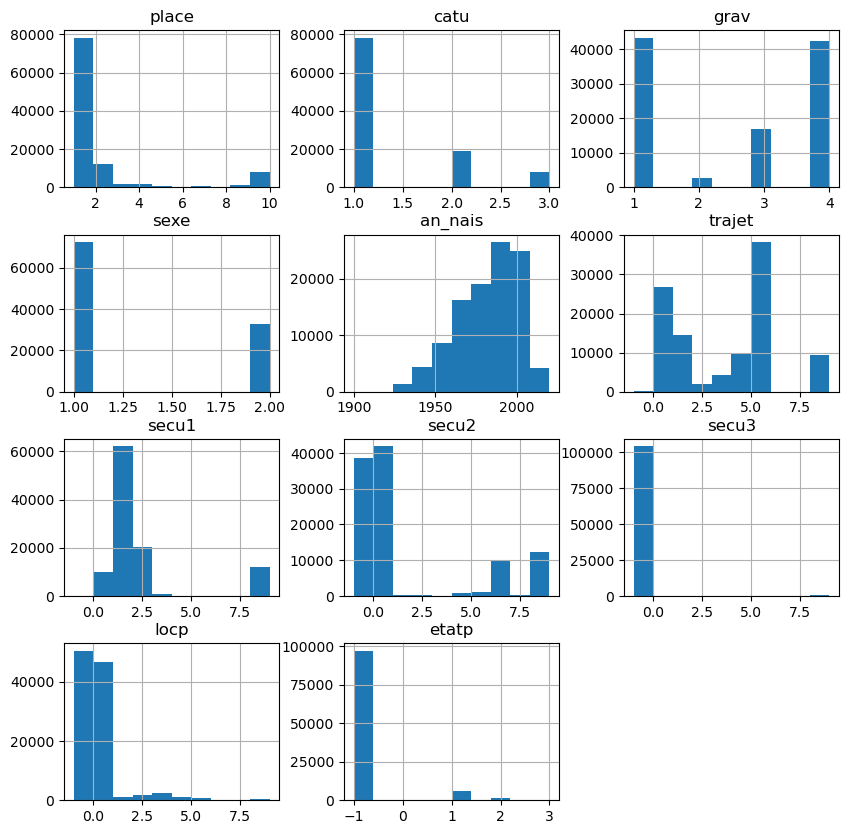

In [7]:
# Analyse rapide des colonnes du fichier dés véhicules immatriculés impliqués

help(ld.load_vehic_immat)

df = dic_vehic_immat[2020]
print(list(df.columns))

df.head()
fig = plt.figure(figsize=(10, 10))
ax = fig.gca()
df[['place', 'catu', 'grav', 'sexe', 'an_nais', 'trajet', 'secu1', 'secu2', 'secu3', 'locp', 'actp', 'etatp']].hist(ax = ax);


## Merge de toutes les données

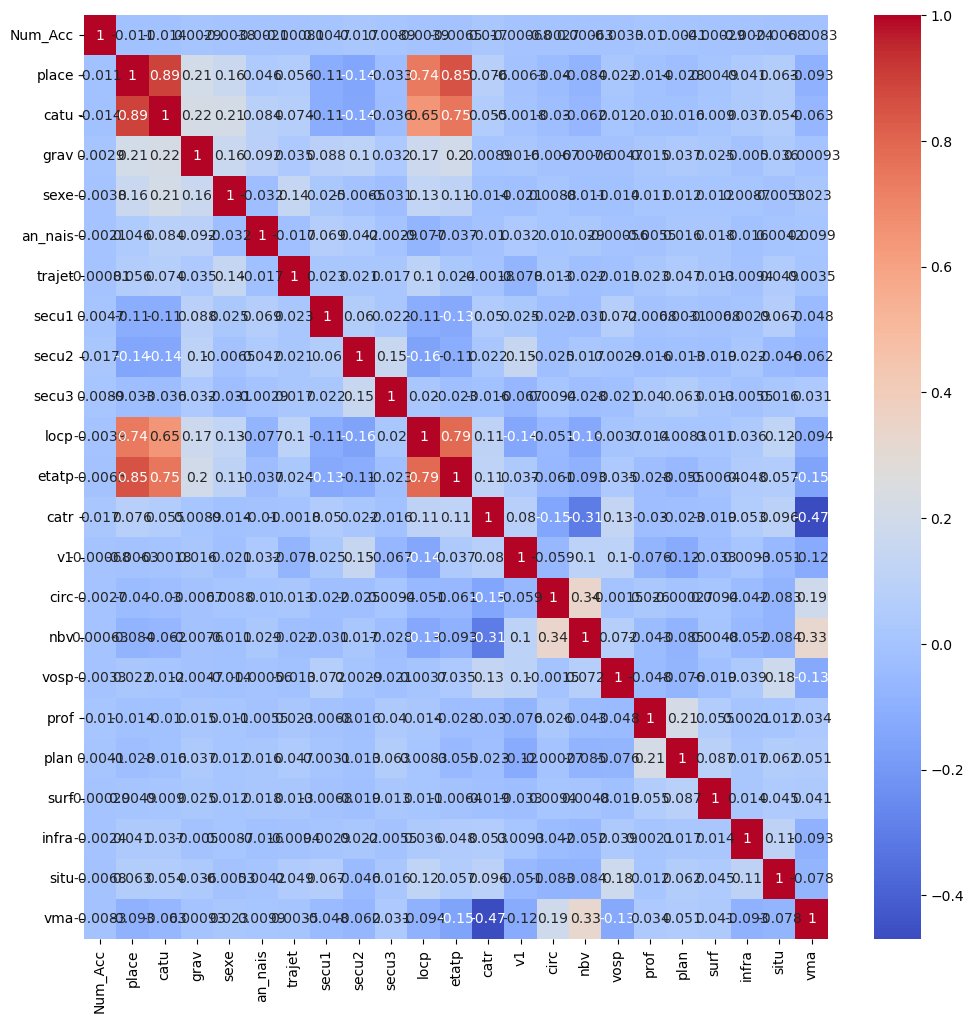

In [8]:
df_caract = dic_caract[2021]
df_lieux = dic_lieux[2021]
df_usagers = dic_usagers[2021]
df_vehic = dic_vehic[2021]
df_vehic_immat = dic_vehic_immat[2021] 

# print('caract :', list(df_caract.columns))
# print('lieux :', list(df_lieux.columns))
# print('usagers :', list(df_usagers.columns))
# print('vehic :', list(df_vehic.columns))
# print('vehic_immat :', list(df_vehic_immat.columns))


# pas de doublons de Num_Acc dans df_caract, et df_lieux -> on peut merger df_usagers, df_caract, et df_lieux sur Numm_Acc
df_caract.Num_Acc.duplicated().sum() + df_lieux.Num_Acc.duplicated().sum()


usagers_caract = df_usagers.merge(right=df_caract, on='Num_Acc', how='left')
usagers_lieux  = df_usagers.merge(right=df_lieux,  on='Num_Acc', how='left')

# cor = usagers_caract.corr()
cor = usagers_lieux.corr()

fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(cor, annot=True, ax=ax, cmap='coolwarm');




## Geolocation

<Figure size 2000x2000 with 0 Axes>

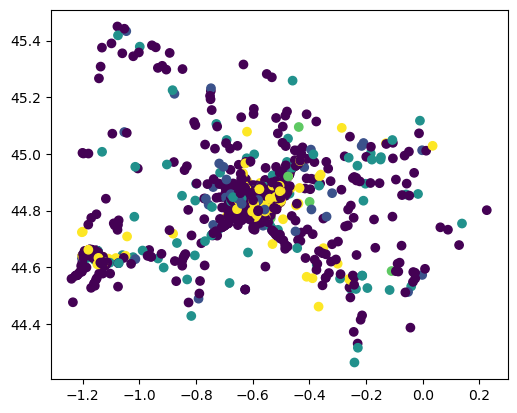

<Figure size 2000x2000 with 0 Axes>

In [10]:
# convert latitude and longitude to good format
df_caract['lat'] = df_caract['lat'].str.replace(',', '.')
df_caract['long'] = df_caract['long'].str.replace(',', '.')
df_caract_33 = df_caract[df_caract.dep == '33']
# df_caract_33 = df_caract_33.iloc[0:10, :]

# print(df_caract_min.head())

gdf = gpd.GeoDataFrame(df_caract_33, geometry=gpd.points_from_xy(df_caract_33.long, df_caract_33.lat))
plt.figure(figsize=(20, 20))
gdf.plot(column='lum')

# 'lum'
# Lumière : conditions d’éclairage dans lesquelles l'accident s'est produit :
# 1 – Plein jour
# 2 – Crépuscule ou aube
# 3 – Nuit sans éclairage public
# 4 – Nuit avec éclairage public non allum

plt.figure(figsize=(20, 20))
gdf.explore()
# gdf.explore(column='lum')
# deps_simple = gpd.read_file('.\\json-maps\\departements-version-simplifiee.geojson')
# deps = gpd.read_file('.\\json-maps\\departements.geojson')

# plt.figure(figsize=(20, 20))
# display Gironde
# deps.loc[33].geometry

# display carte de france découpée par départements
# deps.plot(figsize=(10,10), linewidth=2)

# grille associée
# deps.crs
# import contextily as cx
# cx.providers.keys()

